# Rainfall Prediction - Weather Forecasting
# Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



# Uploading all Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [2]:
raindata = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv') ##Loadibg the dataset

In [3]:
raindata.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
raindata.shape  ##no.of rows and coloumn

(8425, 23)

In [5]:
raindata.dtypes  ###Type of the data

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
raindata.columns    ###coloumns present in our dataset

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
raindata.info()    ###tells about datatype and the null values of each coloumn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
raindata.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
raindata.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# SimpleImputer (To remove null values)

In [10]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [12]:
li=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [14]:
for i in li:
    raindata[i]=imp.fit_transform(raindata[i].values.reshape(-1,1))

In [15]:
imp2=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [16]:
lint=['MinTemp','MaxTemp',  
 'Rainfall',     
 'Evaporation',    
 'Sunshine',   
 'WindGustSpeed',  
 'WindSpeed9am',  
 'WindSpeed3pm', 
 'Humidity9am',  
 'Humidity3pm',  
 'Pressure9am',   
 'Pressure3pm',   
 'Cloud9am', 
 'Cloud3pm',      
 'Temp9am' ,    
 'Temp3pm']

In [17]:
for i in lint:
    raindata[i]=imp2.fit_transform(raindata[i].values.reshape(-1,1))

In [18]:
raindata.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

As we have some null values present in our dataset,we remove null values using simpleImputer Technique

# EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

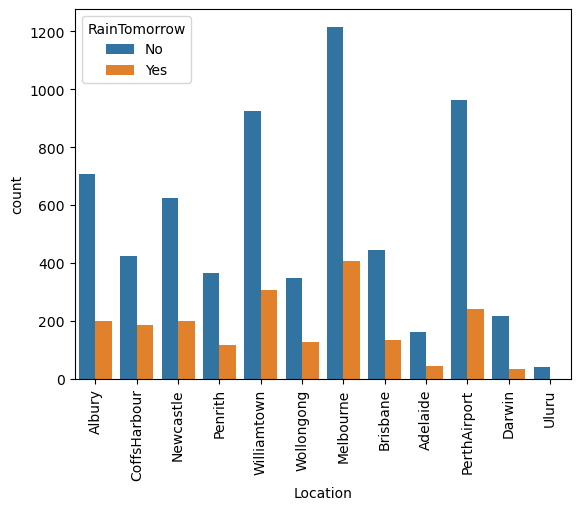

In [19]:
sns.countplot(raindata['Location'],hue=raindata['RainTomorrow'])
plt.xticks(rotation=90)

This plot tells us tha maximum rainfall tomorrow will be in Melbourne

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'W'),
  Text(1, 0, 'NNW'),
  Text(2, 0, 'SE'),
  Text(3, 0, 'ENE'),
  Text(4, 0, 'SW'),
  Text(5, 0, 'SSE'),
  Text(6, 0, 'S'),
  Text(7, 0, 'NE'),
  Text(8, 0, 'N'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'WSW'),
  Text(11, 0, 'ESE'),
  Text(12, 0, 'E'),
  Text(13, 0, 'NW'),
  Text(14, 0, 'WNW'),
  Text(15, 0, 'NNE')])

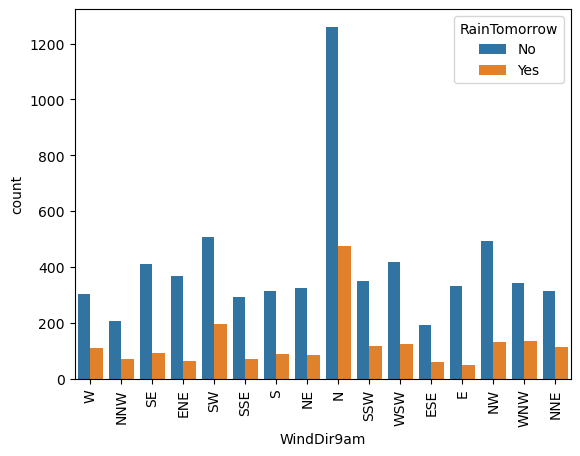

In [21]:
sns.countplot(raindata['WindDir9am'],hue=raindata['RainTomorrow'])
plt.xticks(rotation=90)

Here the plot tells the maximum wind direction at 9pm will be from the North

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'WNW'),
  Text(1, 0, 'WSW'),
  Text(2, 0, 'E'),
  Text(3, 0, 'NW'),
  Text(4, 0, 'W'),
  Text(5, 0, 'SSE'),
  Text(6, 0, 'ESE'),
  Text(7, 0, 'ENE'),
  Text(8, 0, 'NNW'),
  Text(9, 0, 'SSW'),
  Text(10, 0, 'SW'),
  Text(11, 0, 'SE'),
  Text(12, 0, 'N'),
  Text(13, 0, 'S'),
  Text(14, 0, 'NNE'),
  Text(15, 0, 'NE')])

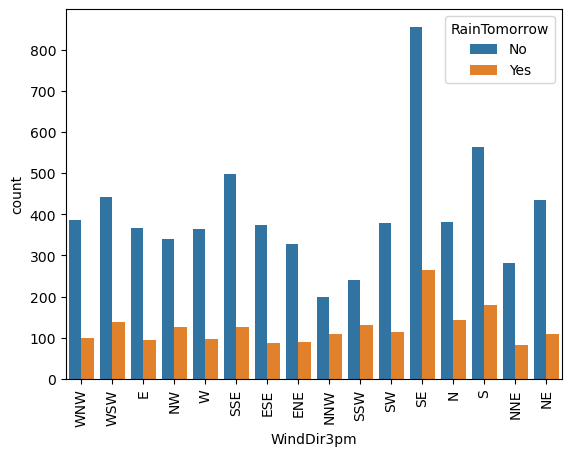

In [22]:
sns.countplot(raindata['WindDir3pm'],hue=raindata['RainTomorrow'])
plt.xticks(rotation=90)

Here,Max wind direction 3pm will from SE

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

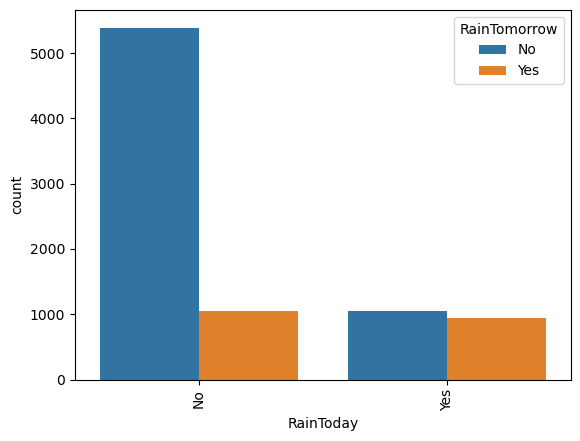

In [23]:
sns.countplot(raindata['RainToday'],hue=raindata['RainTomorrow'])
plt.xticks(rotation=90)

For tomorrow,there can be or cant be rain

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

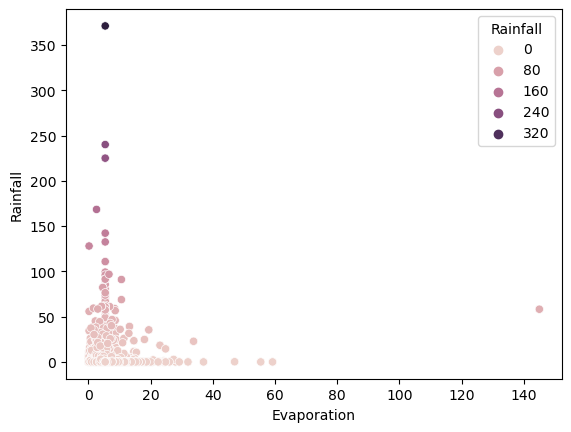

In [24]:
sns.scatterplot(x='Evaporation', y='Rainfall', hue='Rainfall', data=raindata)

Here the rainfall decreases with the increase in the Evaporation

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

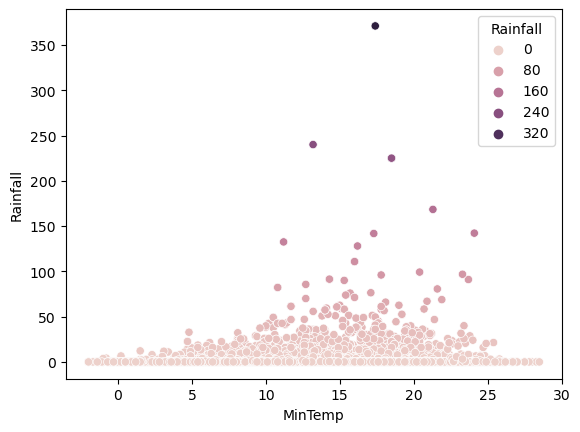

In [120]:
sns.scatterplot(x='MinTemp', y='Rainfall', hue='Rainfall',data=raindata)

Min temperature increases rainfall increases

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

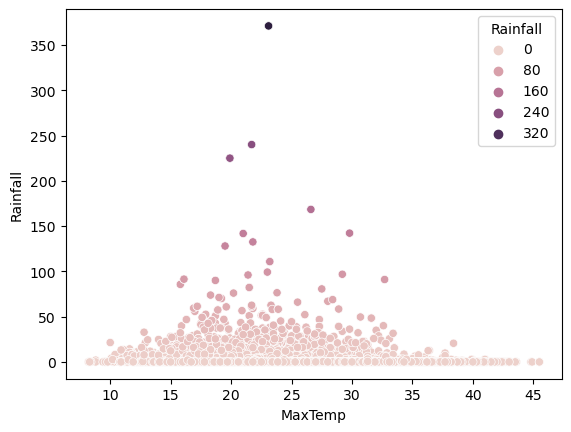

In [29]:
sns.scatterplot(x='MaxTemp', y='Rainfall', hue='Rainfall', data=raindata)

when the temperature is betwwen 18 and 30 the rainfall is higher

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

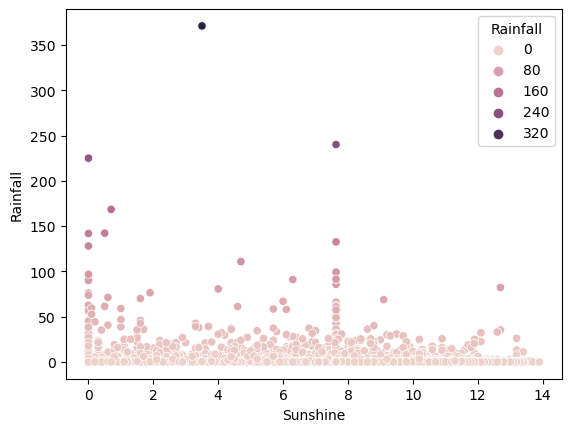

In [121]:
sns.scatterplot(x='Sunshine', y='Rainfall', hue='Rainfall', data=raindata)

when there is sunshine there will be decrease in rainfall

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

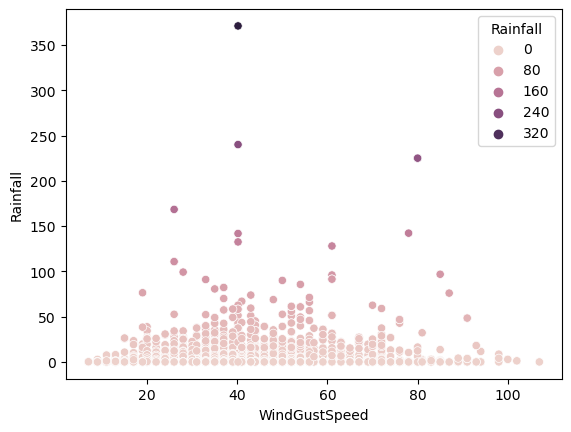

In [31]:
sns.scatterplot(x='WindGustSpeed', y='Rainfall', hue='Rainfall', data=raindata)

when the speed of the wind is between 30 and 50 the rainfall is higher

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

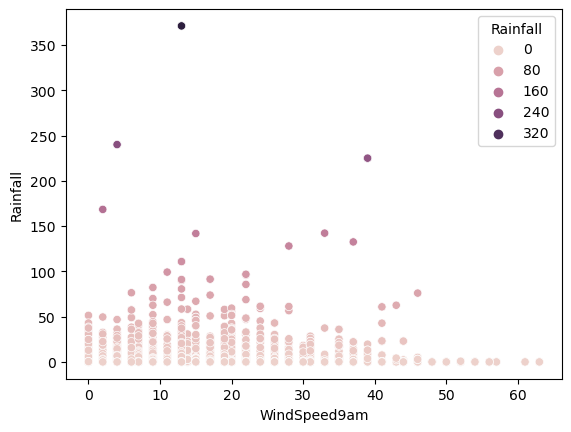

In [32]:
sns.scatterplot(x='WindSpeed9am', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

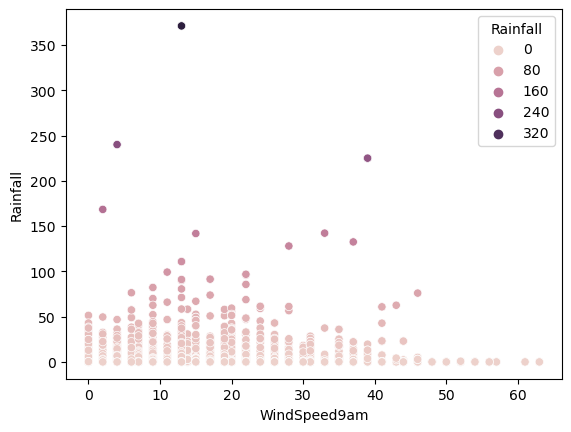

In [33]:
sns.scatterplot(x='WindSpeed9am', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

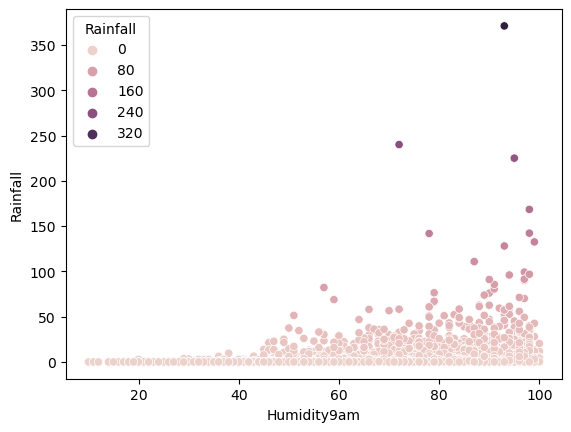

In [34]:
sns.scatterplot(x='Humidity9am', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

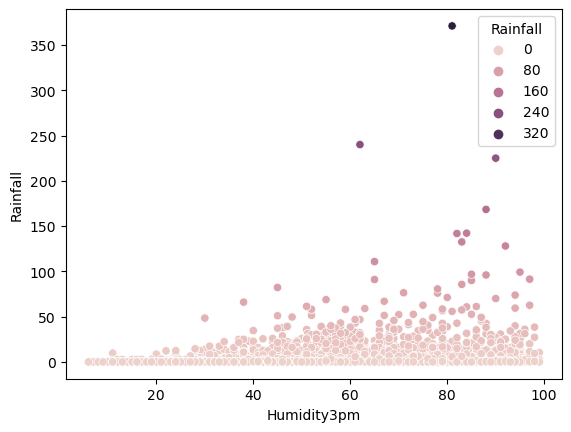

In [35]:
sns.scatterplot(x='Humidity3pm', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

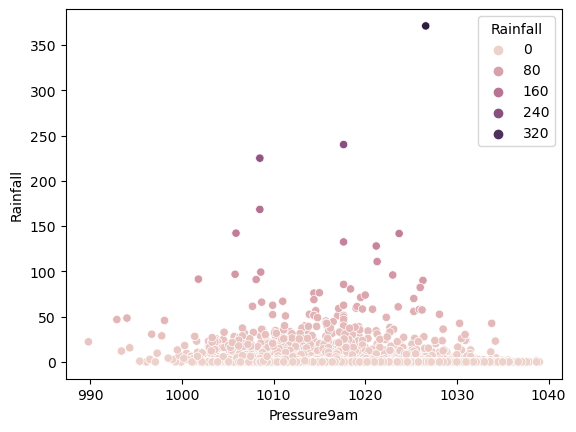

In [36]:
sns.scatterplot(x='Pressure9am', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

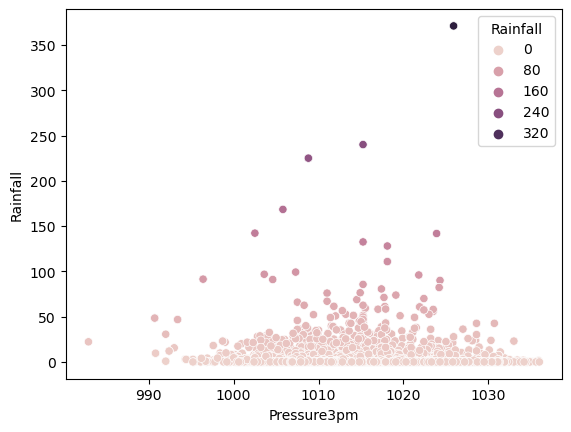

In [37]:
sns.scatterplot(x='Pressure3pm', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

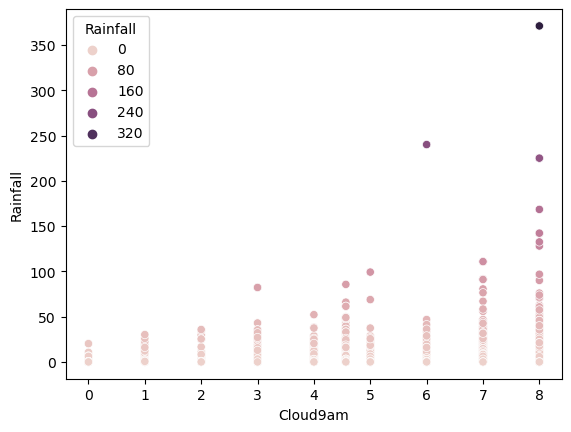

In [38]:
sns.scatterplot(x='Cloud9am', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

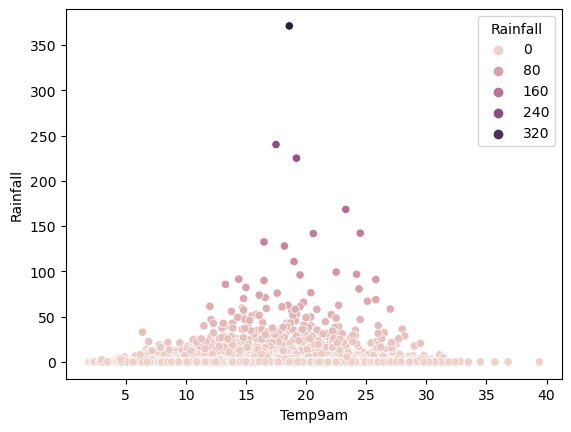

In [39]:
sns.scatterplot(x='Temp9am', y='Rainfall', hue='Rainfall', data=raindata)

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

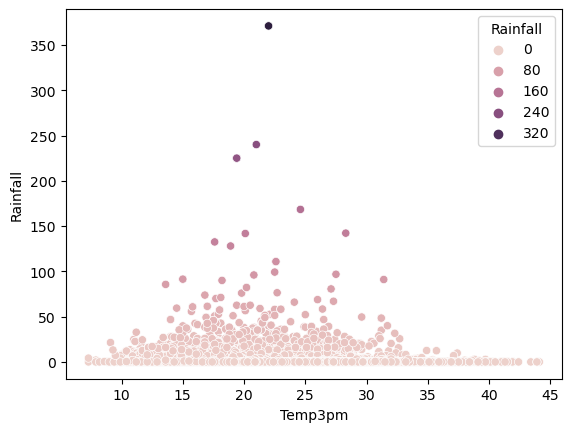

In [40]:
sns.scatterplot(x='Temp3pm', y='Rainfall', hue='Rainfall', data=raindata)

Here, he compare each feature coloumn with the target coloumn to see how the data is distributed

# Label Encoder

In [41]:
l=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l2=['Date','Location']

In [44]:
for i in l:
    raindata[i]=le.fit_transform(raindata[i])

In [46]:
for i in l2:
    raindata[i]=le.fit_transform(raindata[i])

In [47]:
raindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   int32  
 1   Location       8425 non-null   int32  
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   int32  
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   int32  
 10  WindDir3pm     8425 non-null   int32  
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

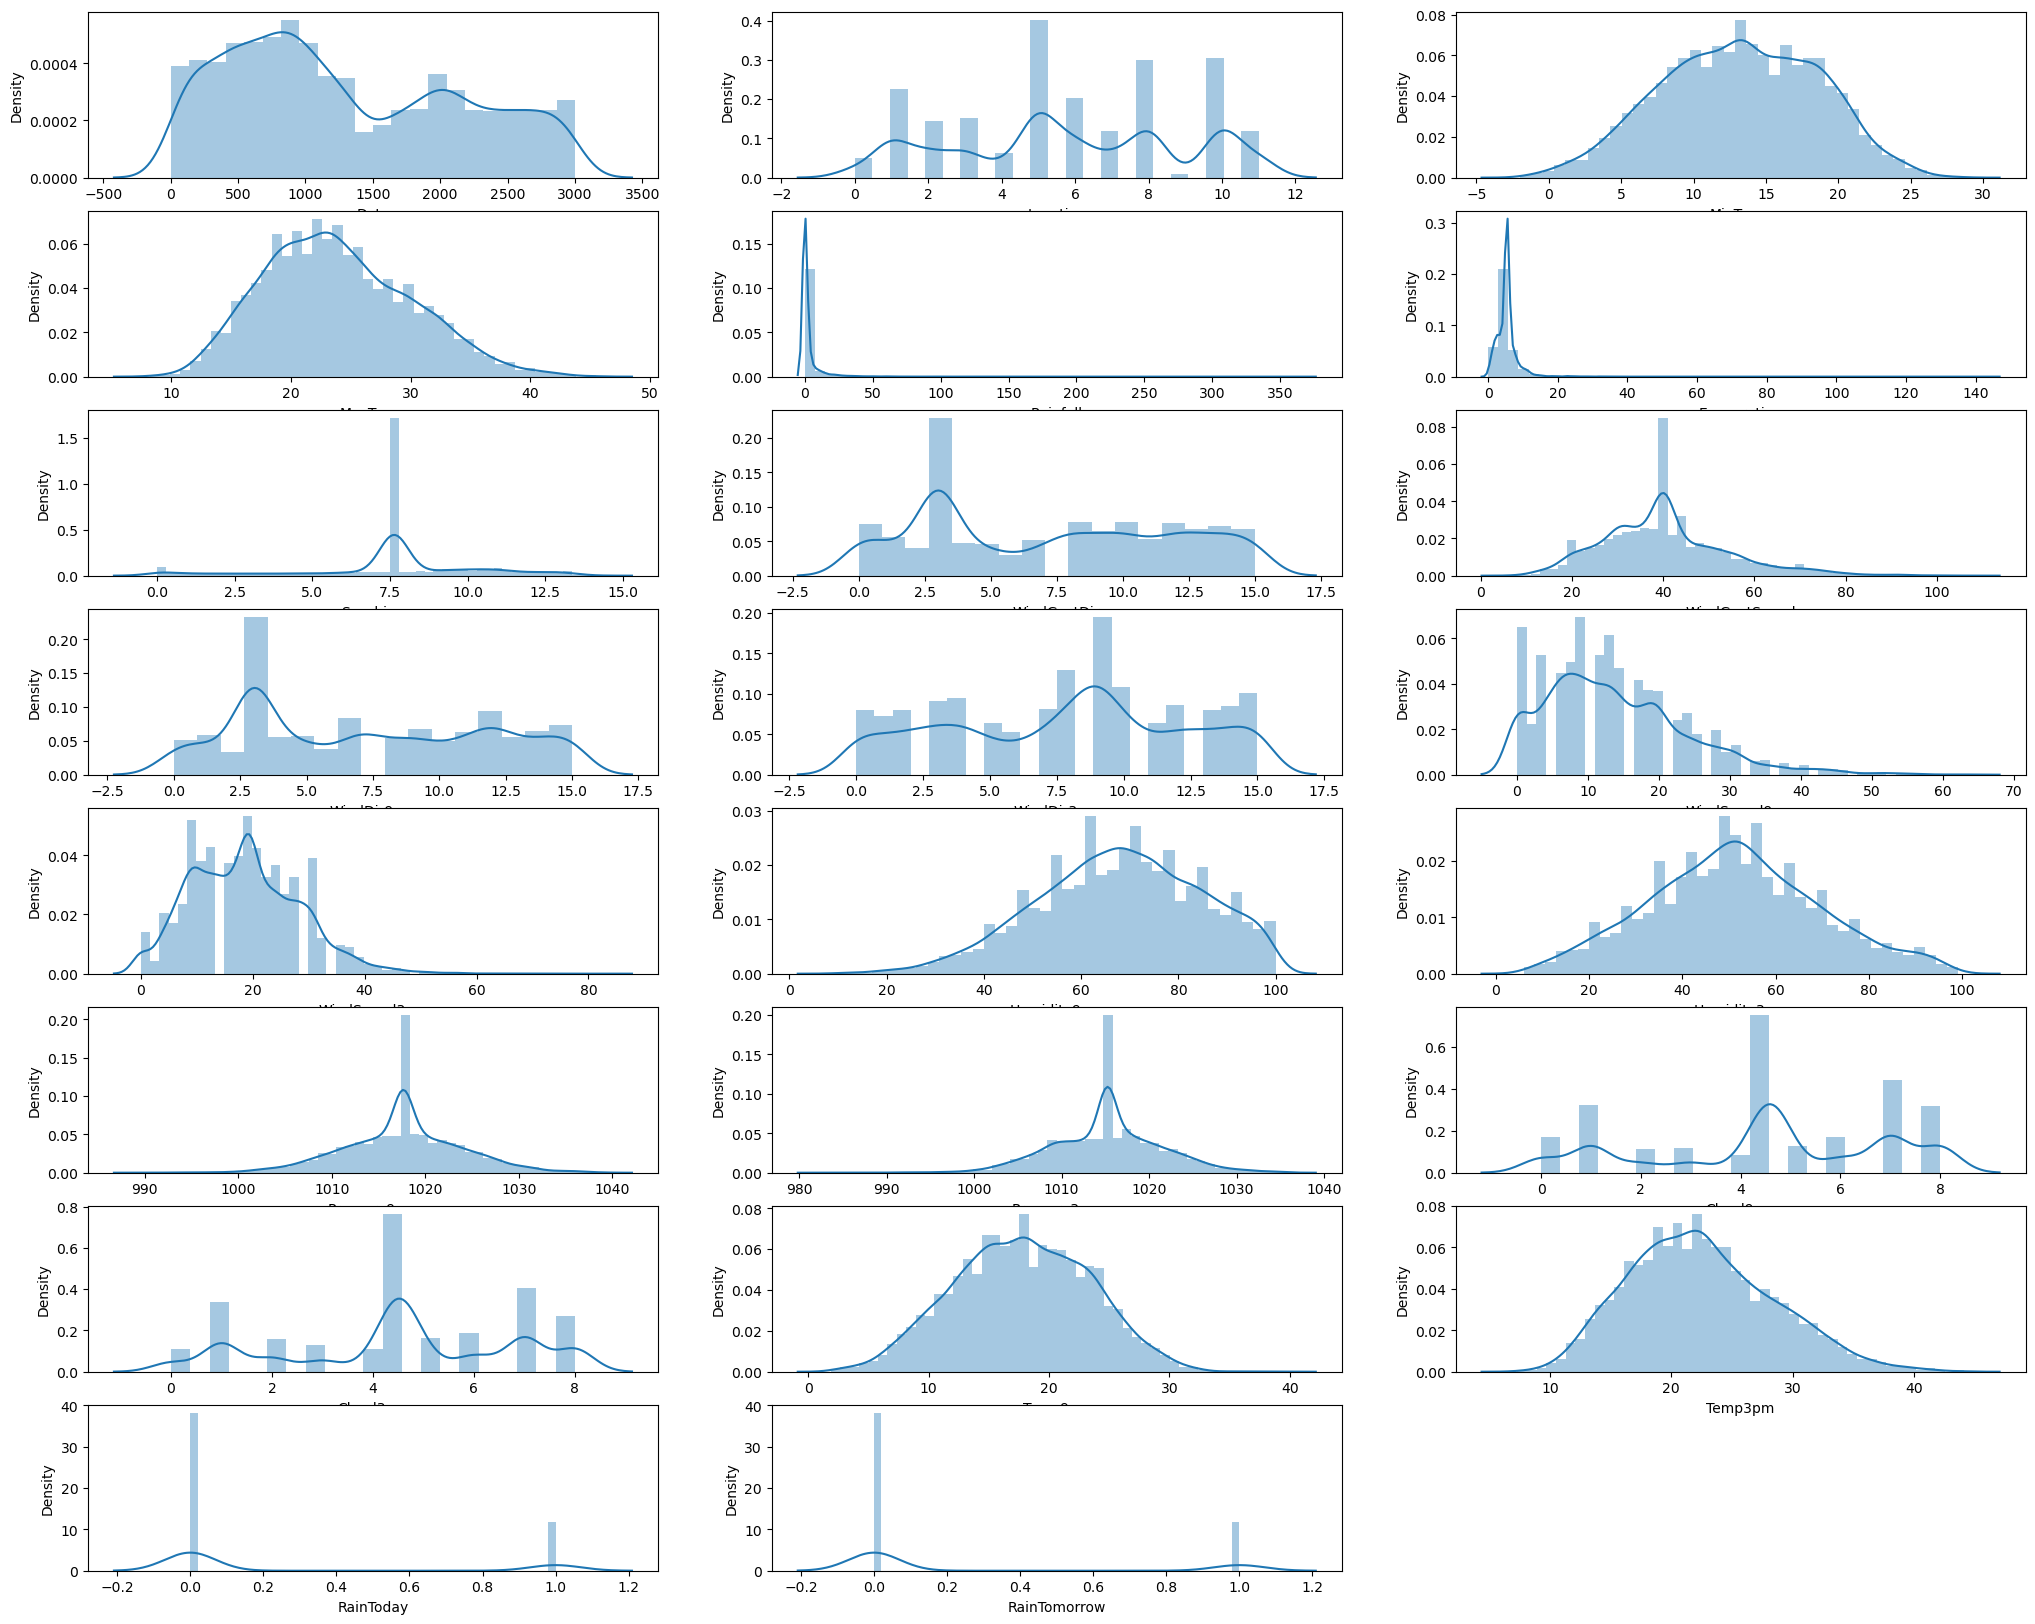

In [49]:
plt.figure(figsize=(25,28))
count =1
for column in raindata:
    if count <= 31:
        ax = plt.subplot(11,3,count)
        sns.distplot(raindata[column])
        plt.xlabel(column) 
    count+=1
plt.show()

# Statistical Analysis

In [50]:
raindata.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,...,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,854.249434,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,...,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,...,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,...,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [51]:
raindata.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,8425.0,1296.570564,854.249434,0.0,589.000000,1088.000000,2021.000000,3003.0
Location,8425.0,5.793591,3.162654,0.0,3.000000,6.000000,8.000000,11.0
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.805913,10.309308,0.0,0.000000,0.000000,1.400000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustDir,8425.0,7.217804,4.702616,0.0,3.000000,7.000000,12.000000,15.0
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindDir9am,8425.0,7.267418,4.588045,0.0,3.000000,7.000000,12.000000,15.0


Here,we can see some outliers were present in the datset

# Heatmap

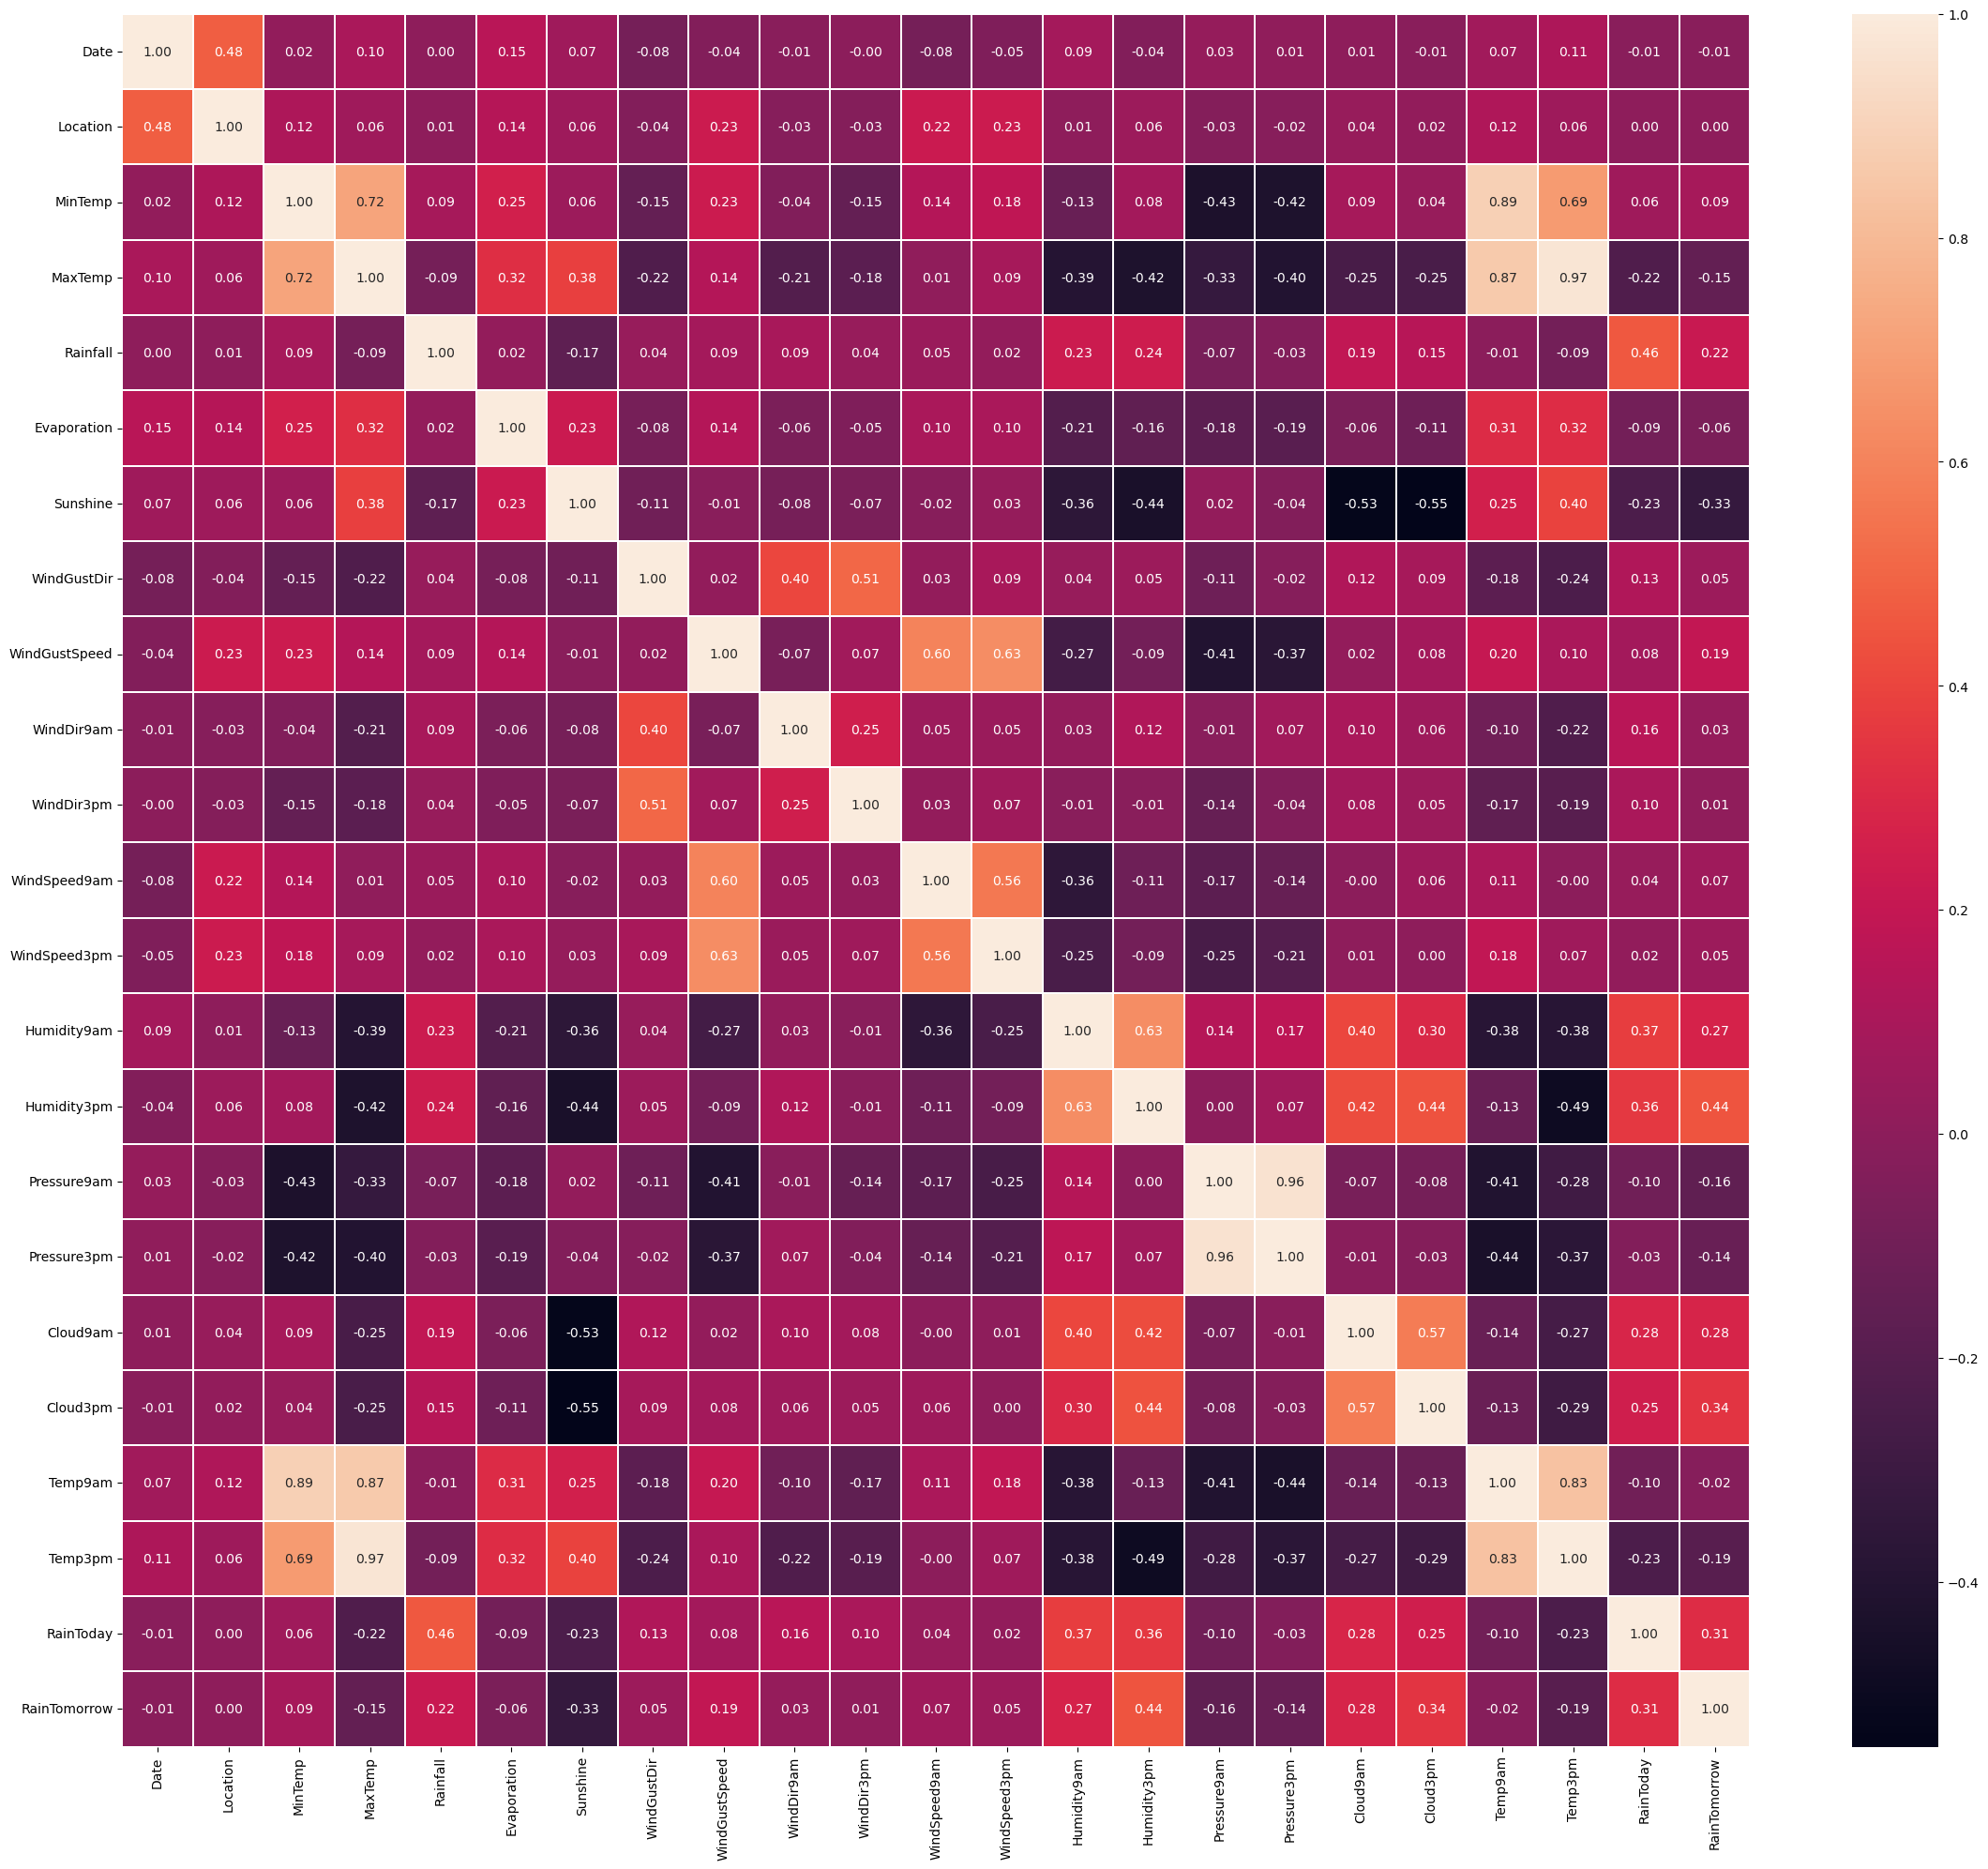

In [52]:
plt.figure(figsize=(28,24))
sns.heatmap(raindata.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

From the hetmap,we can see multicollinearity is present

In [54]:
raindata.corr()["Rainfall"].sort_values()


Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Temp9am         -0.007083
Date             0.004945
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

# VIF

In [55]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [56]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)


In [58]:
x=raindata.drop(["RainTomorrow"],axis=1)
y=raindata["RainTomorrow"]

In [59]:
calc_vif(x)

,Variables,VIF factor
0,Date,4.893556
1,Location,6.641970
2,MinTemp,58.043435
3,MaxTemp,426.072409
4,Rainfall,1.410755
5,Evaporation,3.557236
6,Sunshine,15.173789
7,WindGustDir,5.304799
8,WindGustSpeed,20.788671
9,WindDir9am,4.726116


In [60]:
raindata.corr()["RainTomorrow"].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
Date            -0.011228
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [61]:
dfn=raindata.drop(['MaxTemp', 'Humidity9am' ,'Pressure9am','Temp3pm'],axis=1)

we drop the above mentiones coloumn due to high VIF

# Checking the outliers

Date                AxesSubplot(0.125,0.712609;0.110714x0.167391)
Location         AxesSubplot(0.257857,0.712609;0.110714x0.167391)
MinTemp          AxesSubplot(0.390714,0.712609;0.110714x0.167391)
Rainfall         AxesSubplot(0.523571,0.712609;0.110714x0.167391)
Evaporation      AxesSubplot(0.656429,0.712609;0.110714x0.167391)
Sunshine         AxesSubplot(0.789286,0.712609;0.110714x0.167391)
WindGustDir         AxesSubplot(0.125,0.511739;0.110714x0.167391)
WindGustSpeed    AxesSubplot(0.257857,0.511739;0.110714x0.167391)
WindDir9am       AxesSubplot(0.390714,0.511739;0.110714x0.167391)
WindDir3pm       AxesSubplot(0.523571,0.511739;0.110714x0.167391)
WindSpeed9am     AxesSubplot(0.656429,0.511739;0.110714x0.167391)
WindSpeed3pm     AxesSubplot(0.789286,0.511739;0.110714x0.167391)
Humidity3pm          AxesSubplot(0.125,0.31087;0.110714x0.167391)
Pressure3pm       AxesSubplot(0.257857,0.31087;0.110714x0.167391)
Cloud9am          AxesSubplot(0.390714,0.31087;0.110714x0.167391)
Cloud3pm  

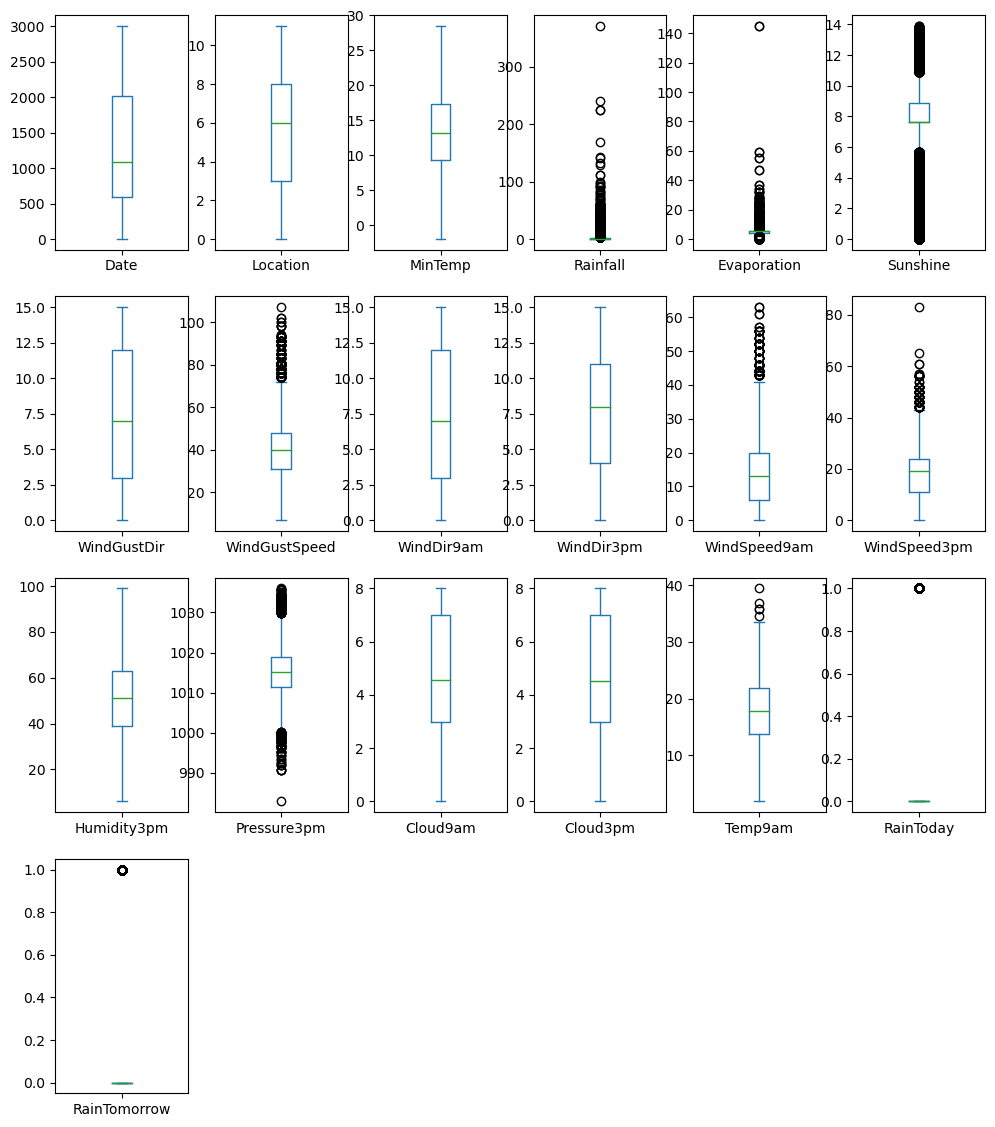

In [62]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

# Removing the outliers

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [64]:
np.where(z>3)

(array([  12,   52,   52,   62,  123,  267,  381,  381,  431,  462,  563,
         568,  602,  683,  699,  713,  748,  770,  796,  797,  802,  928,
         935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
        1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
        1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
        2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
        2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
        2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
        2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3066, 3067,
        3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099,
        3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185,
        3206, 3212, 3212, 3213, 3221, 

In [65]:
dfnew=dfn[(z<3).all(axis=1)]

In [66]:
dfnew.shape

(8031, 19)

loss of data= (8425-8031)/8425*100=4.6% as it is lesser,we can proceed

# checking skewness


In [67]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

In [68]:
list1=['Rainfall','RainToday']

In [69]:
for i in list1:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [70]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         1.670685
dtype: float64

# standard scaler

In [71]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=dfnew.drop(["RainTomorrow"],axis=1)
y=dfnew["RainTomorrow"]
dfx=sc.fit_transform(x)
dfx.mean()

5.744976753665692e-16

# Building the Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [75]:
  def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.25)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# KNClassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.8346613545816733
at random state 0, confusion matrix is [[1475   93]
 [ 239  201]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1568
           1       0.68      0.46      0.55       440

    accuracy                           0.83      2008
   macro avg       0.77      0.70      0.72      2008
weighted avg       0.82      0.83      0.82      2008



at random state 1,  accuracy score is 0.8162350597609562
at random state 1, confusion matrix is [[1447   90]
 [ 279  192]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1537
           1       0.68      0.41      0.51       471

    accuracy                           0.82      2008
   macro avg       0.76      0.67      0.70      2008
weighted avg       0.80      0.82      0.80      2008



at rando

In [77]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81642813 0.79701121 0.81506849 0.79763387 0.82129514]
0.809487368850941
0.010147970846645314


# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.8381474103585658
at random state 0, confusion matrix is [[1474   94]
 [ 231  209]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1568
           1       0.69      0.47      0.56       440

    accuracy                           0.84      2008
   macro avg       0.78      0.71      0.73      2008
weighted avg       0.83      0.84      0.83      2008



at random state 1,  accuracy score is 0.8127490039840638
at random state 1, confusion matrix is [[1439   98]
 [ 278  193]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.88      1537
           1       0.66      0.41      0.51       471

    accuracy                           0.81      2008
   macro avg       0.75      0.67      0.70      2008
weighted avg       0.80      0.81      0.80      2008



at rando

In [79]:
score=cross_val_score(lg,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.85810306 0.80134429 0.77520538 0.80792227 0.83781764 0.85127055]
0.8219438648821731
0.029509751991834345


# DecisionTreeClassifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.8555776892430279
at random state 0, confusion matrix is [[1416  152]
 [ 138  302]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1568
           1       0.67      0.69      0.68       440

    accuracy                           0.86      2008
   macro avg       0.79      0.79      0.79      2008
weighted avg       0.86      0.86      0.86      2008



at random state 1,  accuracy score is 0.8421314741035857
at random state 1, confusion matrix is [[1380  157]
 [ 160  311]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1537
           1       0.66      0.66      0.66       471

    accuracy                           0.84      2008
   macro avg       0.78      0.78      0.78      2008
weighted avg       0.84      0.84      0.84      2008



at rando

In [82]:
score=cross_val_score(dtc,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())


[0.7793953  0.68085106 0.66741321 0.89686099 0.98878924 0.94843049
 0.84080717 0.79820628 0.77242152]
0.8192416966150389
0.10453715246596573


# RandomForestClassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.9033864541832669
at random state 0, confusion matrix is [[1516   52]
 [ 142  298]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1568
           1       0.85      0.68      0.75       440

    accuracy                           0.90      2008
   macro avg       0.88      0.82      0.85      2008
weighted avg       0.90      0.90      0.90      2008



at random state 1,  accuracy score is 0.8839641434262948
at random state 1, confusion matrix is [[1490   47]
 [ 186  285]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1537
           1       0.86      0.61      0.71       471

    accuracy                           0.88      2008
   macro avg       0.87      0.79      0.82      2008
weighted avg       0.88      0.88      0.88      2008



at rando

In [84]:
score=cross_val_score(rf,dfx,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.80313784 0.79865521 0.88606649]
0.8292865147553231
0.04019119209955252


# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[17,19,20],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}

In [86]:
gdsv=GridSearchCV(estimator=rf,param_grid=dict,cv=3)
gdsv.fit(dfx,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [17, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [87]:
gdsv.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'log2',
 'n_estimators': 200}

In [88]:
gdsv.best_score_

0.8367575644378036

From Random forest classifier we got our accuracy of 83%

In [89]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=47,test_size=0.30)
rf=RandomForestClassifier(max_features='auto',max_depth=17,criterion="entropy",n_estimators=100)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")

Accuracy score:-- 0.8763485477178423
Confusion matrix:-- [[1781   70]
 [ 228  331]]
classification report:--               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1851
           1       0.83      0.59      0.69       559

    accuracy                           0.88      2410
   macro avg       0.86      0.78      0.81      2410
weighted avg       0.87      0.88      0.87      2410





# AUC-ROC Curve

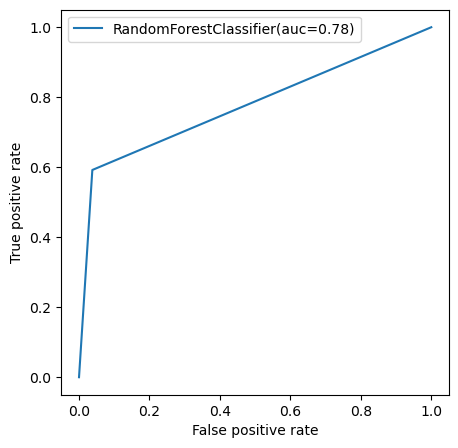

In [90]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.2f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

with random forest classifier, AUC-ROC curve is 78%

# Saving the model

In [91]:
import pickle
filename="raintomorrow.pkl"
pickle.dump(rf,open(filename,'wb'))

# 2) Predicting the Amount of Rainfall

# Checking the outliers

Date                AxesSubplot(0.125,0.712609;0.110714x0.167391)
Location         AxesSubplot(0.257857,0.712609;0.110714x0.167391)
MinTemp          AxesSubplot(0.390714,0.712609;0.110714x0.167391)
Rainfall         AxesSubplot(0.523571,0.712609;0.110714x0.167391)
Evaporation      AxesSubplot(0.656429,0.712609;0.110714x0.167391)
Sunshine         AxesSubplot(0.789286,0.712609;0.110714x0.167391)
WindGustDir         AxesSubplot(0.125,0.511739;0.110714x0.167391)
WindGustSpeed    AxesSubplot(0.257857,0.511739;0.110714x0.167391)
WindDir9am       AxesSubplot(0.390714,0.511739;0.110714x0.167391)
WindDir3pm       AxesSubplot(0.523571,0.511739;0.110714x0.167391)
WindSpeed9am     AxesSubplot(0.656429,0.511739;0.110714x0.167391)
WindSpeed3pm     AxesSubplot(0.789286,0.511739;0.110714x0.167391)
Humidity3pm          AxesSubplot(0.125,0.31087;0.110714x0.167391)
Pressure3pm       AxesSubplot(0.257857,0.31087;0.110714x0.167391)
Cloud9am          AxesSubplot(0.390714,0.31087;0.110714x0.167391)
Cloud3pm  

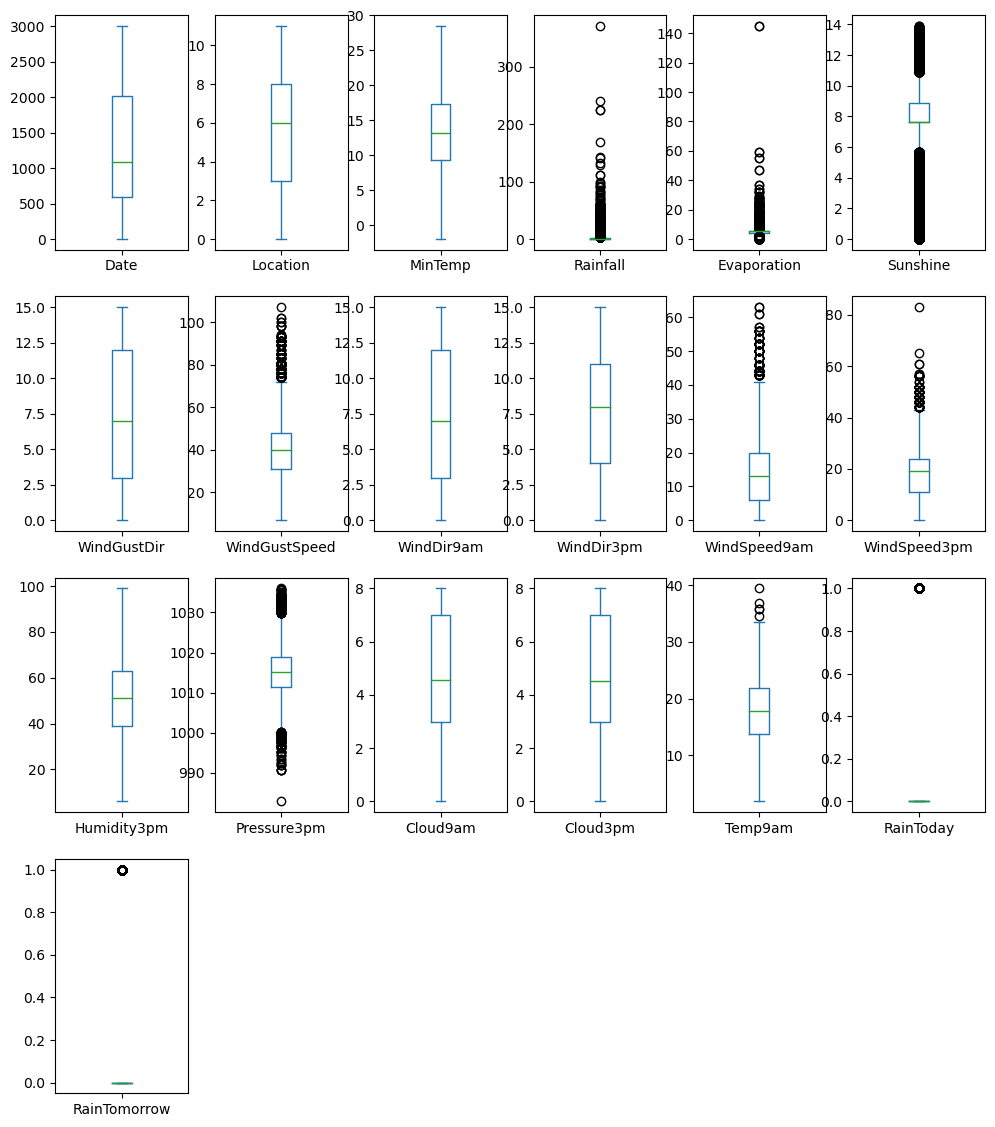

In [93]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

From the above plot, it clearly shows oultiers are present

# Removing outliers using z-score method

In [94]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))
np.where(z>3)

(array([  12,   52,   52,   62,  123,  267,  381,  381,  431,  462,  563,
         568,  602,  683,  699,  713,  748,  770,  796,  797,  802,  928,
         935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
        1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
        1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
        2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
        2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
        2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
        2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3066, 3067,
        3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099,
        3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185,
        3206, 3212, 3212, 3213, 3221, 

In [95]:
dfnew=dfn[(z<3).all(axis=1)]

In [97]:
dfnew.shape

(8031, 19)

%loss of data=(8425-8031)/8425*100=4.6%  as loss of data is lesser,we can proceed

# Checking skewness of the data

In [98]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

In [99]:
x=dfnew.drop(["Rainfall"],axis=1)
y=dfnew["Rainfall"]

In [100]:
list2=['RainTomorrow','RainToday']
for i in list2:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [101]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

# Standard Scaler

In [103]:
sc=StandardScaler()
dfx=sc.fit_transform(x)
dfx.mean()

5.614230362796845e-16

# Building the Model

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

# KnRegressor

In [105]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.46925001861400895
at random state 0, mean squared error is 12.305143301111553
at random state 0, mean absolute error is 1.394863800545984


at random state 1, testing accuracy is 0.4486082048751532
at random state 1, mean squared error is 12.194767005294024
at random state 1, mean absolute error is 1.4323669002856656


at random state 2, testing accuracy is 0.4757881594519091
at random state 2, mean squared error is 12.124920282047988
at random state 2, mean absolute error is 1.402444042715523


at random state 3, testing accuracy is 0.5048112152207578
at random state 3, mean squared error is 10.69627690903849
at random state 3, mean absolute error is 1.3216711462370443


at random state 4, testing accuracy is 0.4330667426546726
at random state 4, mean squared error is 12.390293663415395
at random state 4, mean absolute error is 1.3881168689815648


at random state 5, testing accuracy is 0.4611787062701276
at random state 5, mean squared error i

In [106]:
score=cross_val_score(knr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.26733023 0.43121582 0.32734047 0.59443892 0.59152129 0.48063125
 0.44862109 0.4994222  0.44939627]
0.4544352821579415
0.10157830780913712


# Linear Regressor

In [109]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model_selection(lr)

at random state 0, testing accuracy is 0.4837917595065415
at random state 0, mean squared error is 11.968001121543368
at random state 0, mean absolute error is 1.600649923399849


at random state 1, testing accuracy is 0.4578992084365946
at random state 1, mean squared error is 11.989284035328026
at random state 1, mean absolute error is 1.6553627370683193


at random state 2, testing accuracy is 0.4894619339078582
at random state 2, mean squared error is 11.808648476627223
at random state 2, mean absolute error is 1.5884423282322264


at random state 3, testing accuracy is 0.4782834250372192
at random state 3, mean squared error is 11.26928784609858
at random state 3, mean absolute error is 1.6046031360498494


at random state 4, testing accuracy is 0.467697993791487
at random state 4, mean squared error is 11.633429665833308
at random state 4, mean absolute error is 1.5893255856425836


at random state 5, testing accuracy is 0.49637826485727743
at random state 5, mean squared error i

In [110]:
score=cross_val_score(lr,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.50469412 0.46196107 0.41262184 0.5134939 ]
0.47319273230593933
0.040035936237868615


# RandomForestRegressor

In [111]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.5880016850826332
at random state 0, mean squared error is 9.551951922138114
at random state 0, mean absolute error is 1.1733982554363944


at random state 1, testing accuracy is 0.5632360940606249
at random state 1, mean squared error is 9.659617927479063
at random state 1, mean absolute error is 1.214610973418129


at random state 2, testing accuracy is 0.6212693124277412
at random state 2, mean squared error is 8.759968852244164
at random state 2, mean absolute error is 1.1559224210363557


at random state 3, testing accuracy is 0.6027314960455107
at random state 3, mean squared error is 8.581159461095282
at random state 3, mean absolute error is 1.150676091980827


at random state 4, testing accuracy is 0.5838943174710727
at random state 4, mean squared error is 9.09396570892808
at random state 4, mean absolute error is 1.1704723269719681


at random state 5, testing accuracy is 0.6066467733582852
at random state 5, mean squared error is 9.43

In [112]:
score=cross_val_score(rfr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())


[0.45613144 0.48057815 0.49575512 0.86912417 0.92441763 0.80335017
 0.62694529 0.50819543 0.5388145 ]
0.6337013224779927
0.1724105003770881


# Final Model

In [115]:
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=21,test_size=0.2)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {44} testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {44} mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {44}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 44 testing accuracy is 0.6511434845186793
at random state 44 mean squared error is 8.023003298953142
at random state 44, mean absolute error is 1.0532057355970499


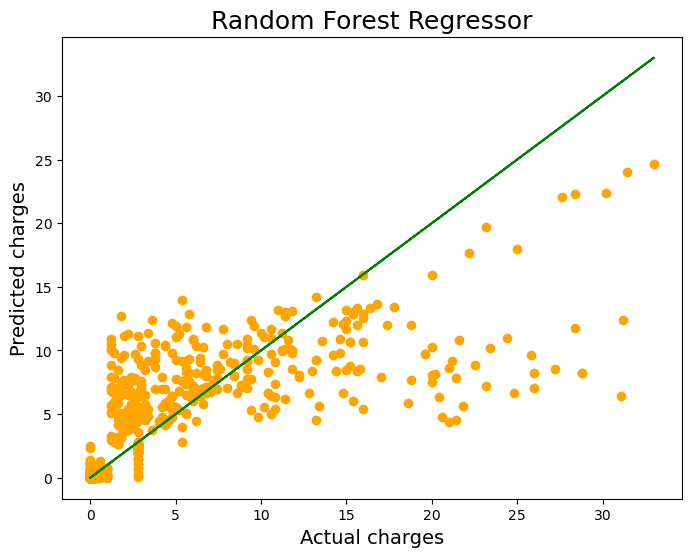

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='orange')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()

# Saving the Model

In [119]:
import pickle
filename = 'rainfallPredict.pkl'
pickle.dump(knr,open(filename, 'wb'))